In [16]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
#read the dataset
dataset=pd.read_csv('USA_Housing.csv')
#statististical data of the dataset
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
#fill the null values if any
dataset.isnull().any()
dataset=dataset.fillna(method='ffill')

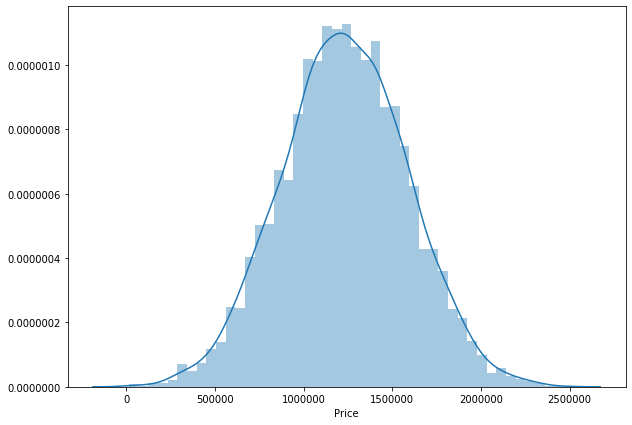

In [19]:
#filtering the required x and y values
x=dataset[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y=dataset['Price'].values
#plot the distribution
plt.figure(figsize=(10,7))
plt.tight_layout()
sns.distplot(dataset['Price'])

In [20]:
#split the given data as train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [21]:
#fit the data into regresiion model
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#find the slope value 
coef_df=pd.DataFrame(regressor.coef_,x.columns,columns=['coefficient'])
coef_df

,coefficient
Avg. Area Income,21.670416
Avg. Area House Age,165809.484609
Avg. Area Number of Rooms,121392.990825
Area Population,15.244346


In [23]:
#using the testing data to predict the y values
y_pred=regressor.predict(x_test)

In [37]:
#creating a dataframe of actual and predicted values
df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df1=df.head(30)

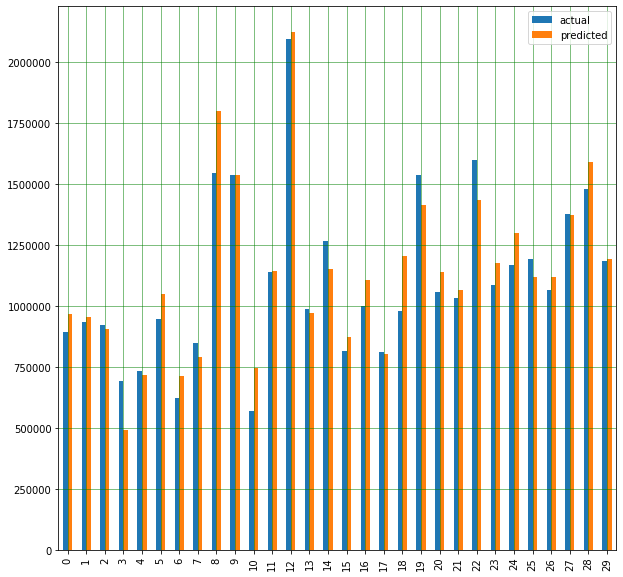

In [42]:
#plot of actual vs predicted values
df1.plot(kind='bar' , figsize=(10,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='1.5',color='red')
plt.show()

In [45]:
#measuring the correctness of the regression model built
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error :',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 81802.61058254853
Mean squared error : 10407012308.900715
Root mean squared error : 102014.76515142656
